In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/boycottbollywood-tweets-dataset/tweets1m_BoycottVikramVedha.csv
/kaggle/input/boycottbollywood-tweets-dataset/tweets1m_boycottrakshabandhan.csv
/kaggle/input/boycottbollywood-tweets-dataset/tweets1mLaalSinghChadda.csv
/kaggle/input/boycottbollywood-tweets-dataset/boycottbrahmastra.csv
/kaggle/input/boycottbollywood-tweets-dataset/tweets1m.csv
/kaggle/input/englishbadwords/english_bad_words.txt
/kaggle/input/hindibadwords/hindi_bad_words.txt


# Import Tweets Data

In [5]:
data = pd.read_csv("../input/boycottbollywood-tweets-dataset/tweets1m.csv")

In [6]:
data.head()

,Unnamed: 0,Date,User,Tweet
0,0,2022-08-29 23:32:43+00:00,MauryanChanakya,Never Emotional.\nBUT THIS MAKES ME SAD.\n#ISu...
1,1,2022-08-29 23:28:45+00:00,Fragrancevelly,"#SupportGemsofBollywood \n\nFrom A 2 Z , sabki..."
2,2,2022-08-29 23:00:42+00:00,MomoDarling3,@taran_adarsh @NetflixIndia Hahahahaha @Netfli...
3,3,2022-08-29 22:56:52+00:00,SanataniBong,@indiantweeter Can we shoot 153a(1) and 295a o...
4,4,2022-08-29 22:49:49+00:00,ChaiWithCharan_,@simplepassive @aliaa08 @RANBIRKAPOORR Point t...


In [7]:
data.tail()

,Unnamed: 0,Date,User,Tweet
310074,310074,2021-06-14 00:09:42+00:00,Raj4Ssr,SUSHANT JUSTICE MATTERS \n#JusticeForSushantSi...
310075,310075,2021-06-14 00:06:34+00:00,rahulshahare,There's only one effective way for #JusticeFor...
310076,310076,2021-06-14 00:06:14+00:00,oFOnnRgZmQ4iPYp,‘तैमूर की अम्मी नहीं हैं माँ सीता के रोल के ला...
310077,310077,2021-06-14 00:04:04+00:00,SanataniChauhan,हमारी चुप्पी को हमारी कमजोरी न समझे bollywood ...
310078,310078,2021-06-14 00:00:39+00:00,Anshika40828005,You always be in our hearts ❤️#SushanthSinghRa...


In [8]:
data = data.drop(['Unnamed: 0'], axis = 1)

In [9]:
data.shape

(310079, 3)

In [10]:
data.columns

Index(['Date', 'User', 'Tweet'], dtype='object')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310079 entries, 0 to 310078
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Date    310079 non-null  object
 1   User    310079 non-null  object
 2   Tweet   310079 non-null  object
dtypes: object(3)
memory usage: 7.1+ MB


Let's see some of the sample tweets

# What all the most hashtags used ?

Lets extract the hashtags used in each tweets

In [12]:
# sample_tweet = '@GemsOfBollywood @backupamit #Bollywood walo ne har movie me hinduo ko hi galat bataya hai .... Itna dekhne ke bad fir bhi kuch logo ki aankhe nahi khuli hai ..... Abhi bhi aankhe band kar rakhi hai #BoycottBrahmastra #BoycottLaalSinghChaddha #BoycottPathan #BoycottVikramVedha #Boycottjawan'

In [13]:
def hashtag_extractor(sample_tweet):
    hash_tags = []
    for i in sample_tweet['Tweet'].split(' '):
        if len(i) >0 and i[0] == '#':
            hash_tags.append(i)
    return hash_tags

In [14]:
data['hash_tags'] = data.apply(lambda sample_tweet: hashtag_extractor(sample_tweet),axis=1)

In [15]:
data.head(5)

,Date,User,Tweet,hash_tags
0,2022-08-29 23:32:43+00:00,MauryanChanakya,Never Emotional.\nBUT THIS MAKES ME SAD.\n#ISu...,[]
1,2022-08-29 23:28:45+00:00,Fragrancevelly,"#SupportGemsofBollywood \n\nFrom A 2 Z , sabki...","[#SupportGemsofBollywood, #WaatLagaDenge]"
2,2022-08-29 23:00:42+00:00,MomoDarling3,@taran_adarsh @NetflixIndia Hahahahaha @Netfli...,"[#BoycottBollywood, #BoycottNetflixIndia]"
3,2022-08-29 22:56:52+00:00,SanataniBong,@indiantweeter Can we shoot 153a(1) and 295a o...,"[#BoycottBrahmastra, #BoycottBollywood]"
4,2022-08-29 22:49:49+00:00,ChaiWithCharan_,@simplepassive @aliaa08 @RANBIRKAPOORR Point t...,"[#BoycottBrahmastra, #BoycottBollywood, #Justi..."


In [16]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [17]:
text = " ".join(t for tags in data['hash_tags'] for t in tags)

In [18]:
word_cloud = WordCloud(collocations = False, background_color = 'black',min_font_size = 6,
                       max_font_size= 50).generate(text) ##width=400, height=400

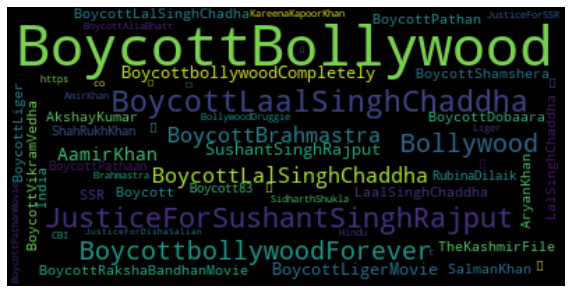

In [19]:
plt.figure(figsize=(10,10))
plt.imshow(word_cloud, interpolation='bilinear' )
plt.axis("off")
plt.show()

No supprises here atleast.

In [20]:
count = 0
top_ten = {}
for k,v in word_cloud.words_.items():
    count += 1
    if count < 10 and k not in  top_ten:
        top_ten.update({k:v})
top_ten

{'BoycottBollywood': 1.0,
 'BoycottLaalSinghChaddha': 0.06343050007421414,
 'JusticeForSushantSinghRajput': 0.05507334292739276,
 'Bollywood': 0.04678717321579535,
 'BoycottbollywoodForever': 0.045302890479294255,
 'BoycottLalSinghChaddha': 0.029408158392328194,
 'BoycottBrahmastra': 0.028678923830482005,
 'AamirKhan': 0.020721877682195706,
 'BoycottLigerMovie': 0.01828249127177217}

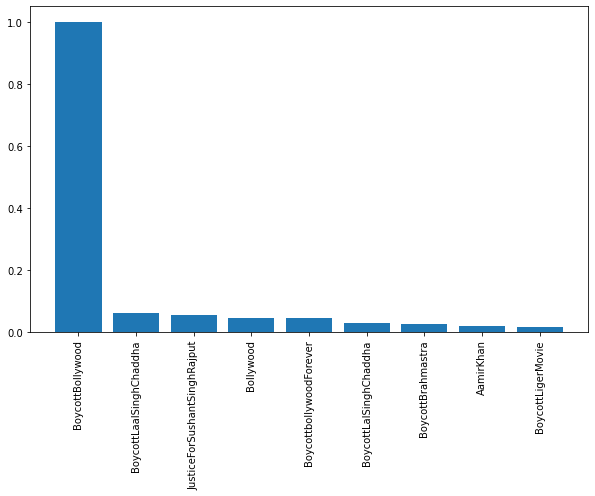

In [21]:
names = list(top_ten.keys())
values = list(top_ten.values())
plt.figure(figsize=(10,6))
plt.bar(range(len(top_ten)),values,tick_label=names,)
plt.xticks(rotation=90)
plt.show()

There is in general boycott for the Bollywood movies.

Two individual comes in the top 10 Hashtags are :
1. Amir Khan : Folks are not happy with his recent perfomances.
1. Sushant Singh Rajput : People are demanding justice for SSR.

We can also ignore #BoycottBollywood as it is criteria for tweets collection.

# What time of the day twitter buzzing ?

In [22]:
data['Date'] =  pd.to_datetime(data['Date']).dt.tz_convert('Asia/Kolkata') 

In [23]:
data.head()['Date']

0   2022-08-30 05:02:43+05:30
1   2022-08-30 04:58:45+05:30
2   2022-08-30 04:30:42+05:30
3   2022-08-30 04:26:52+05:30
4   2022-08-30 04:19:49+05:30
Name: Date, dtype: datetime64[ns, Asia/Kolkata]

In [24]:
data['Date'].describe(datetime_is_numeric=True)

count                                 310079
mean     2022-04-08 09:47:13.130227968+05:30
min                2021-06-14 05:30:39+05:30
25%         2021-12-31 21:30:38.500000+05:30
50%                2022-05-06 17:03:34+05:30
75%         2022-08-03 20:31:21.500000+05:30
max                2022-08-30 05:02:43+05:30
Name: Date, dtype: object

These tweets span over from June 21 to Aug 22.


In [25]:
data['Hour_of_day'] = data['Date'].dt.hour

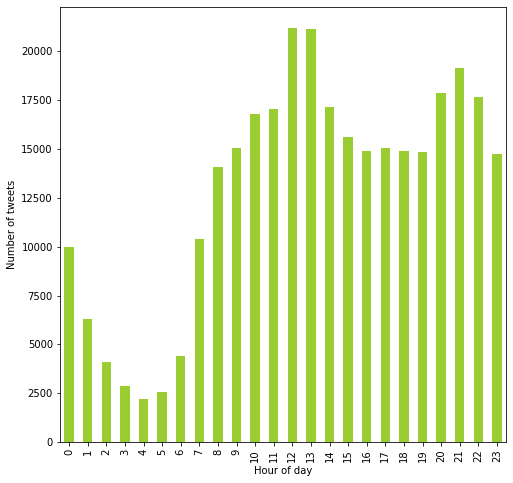

In [26]:
data['Hour_of_day'].value_counts().sort_index().plot(kind='bar',
                                                         figsize = (8,8),
                                                         color = 'yellowgreen').set(xlabel='Hour of day',
         ylabel='Number of tweets') #.plot(kind='bar',x='Hour_of_day',f)
plt.show()

* Tweets happened majorly during the acitve day hours.
* There is even a afternoon drop during the nap time.

# Trend across the period 

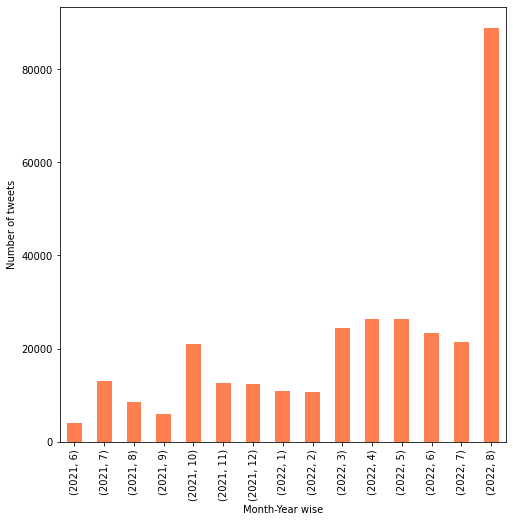

In [27]:
data.groupby([data["Date"].dt.year,
                  data["Date"].dt.month])['Tweet'].count().plot(kind="bar",figsize = (8,8),
                                                           color = 'coral').set(xlabel='Month-Year wise',
         ylabel='Number of tweets')
plt.show()

The Trend takes picks up pace during the **major movie releases** like **laal singh chaddha, Brahmāstra**.

# Was there a weekend/Weekday effect ?

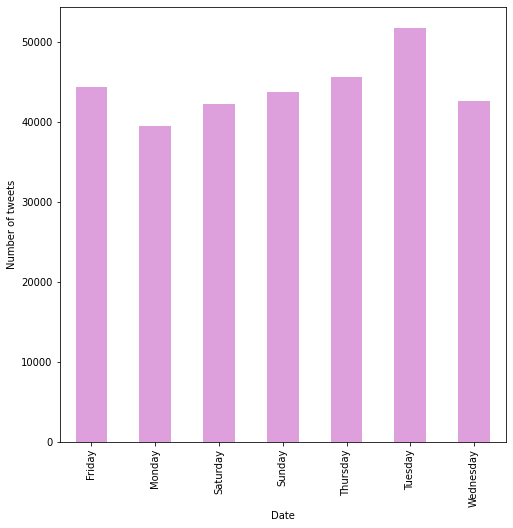

In [28]:
data['Date'].dt.day_name().value_counts().sort_index().plot(kind='bar',
                                                         figsize = (8,8),
                                                         color = 'plum').set(xlabel='Date',
                                                                                    ylabel='Number of tweets')
plt.show()

1. The tweets are almost spread out evenly for all days of the week.
1. Most tweets come on Tuesday.
1. Around the weekends folks are busy with their lives 🙌.


# Twitter and its relationship with Toxic tweets


In [29]:
# Filter out tweets which are toxic
data.head()

,Date,User,Tweet,hash_tags,Hour_of_day
0,2022-08-30 05:02:43+05:30,MauryanChanakya,Never Emotional.\nBUT THIS MAKES ME SAD.\n#ISu...,[],5
1,2022-08-30 04:58:45+05:30,Fragrancevelly,"#SupportGemsofBollywood \n\nFrom A 2 Z , sabki...","[#SupportGemsofBollywood, #WaatLagaDenge]",4
2,2022-08-30 04:30:42+05:30,MomoDarling3,@taran_adarsh @NetflixIndia Hahahahaha @Netfli...,"[#BoycottBollywood, #BoycottNetflixIndia]",4
3,2022-08-30 04:26:52+05:30,SanataniBong,@indiantweeter Can we shoot 153a(1) and 295a o...,"[#BoycottBrahmastra, #BoycottBollywood]",4
4,2022-08-30 04:19:49+05:30,ChaiWithCharan_,@simplepassive @aliaa08 @RANBIRKAPOORR Point t...,"[#BoycottBrahmastra, #BoycottBollywood, #Justi...",4


In [30]:
def tweet_text_extractor(sample_tweet):
    """
    Remove the hashtag and http links form the tweets
    returns : the clean text
    """
    tweet_text = []
    for i in sample_tweet['Tweet'].split('\n'):
        for j in i.split(' '):
            if '#'in j:
                continue
            elif 'http' in j:
                continue
            else:
                tweet_text.append(j)
    tweet_text = list(filter(None, tweet_text))
    tweet_text =' '.join(tweet_text)
    return tweet_text

In [31]:
data['tweet_text'] = data.apply(lambda sample_tweet: tweet_text_extractor(sample_tweet),axis=1)

In [32]:
data.head()

,Date,User,Tweet,hash_tags,Hour_of_day,tweet_text
0,2022-08-30 05:02:43+05:30,MauryanChanakya,Never Emotional.\nBUT THIS MAKES ME SAD.\n#ISu...,[],5,Never Emotional. BUT THIS MAKES ME SAD.
1,2022-08-30 04:58:45+05:30,Fragrancevelly,"#SupportGemsofBollywood \n\nFrom A 2 Z , sabki...","[#SupportGemsofBollywood, #WaatLagaDenge]",4,"From A 2 Z , sabki"
2,2022-08-30 04:30:42+05:30,MomoDarling3,@taran_adarsh @NetflixIndia Hahahahaha @Netfli...,"[#BoycottBollywood, #BoycottNetflixIndia]",4,@taran_adarsh @NetflixIndia Hahahahaha @Netfli...
3,2022-08-30 04:26:52+05:30,SanataniBong,@indiantweeter Can we shoot 153a(1) and 295a o...,"[#BoycottBrahmastra, #BoycottBollywood]",4,@indiantweeter Can we shoot 153a(1) and 295a o...
4,2022-08-30 04:19:49+05:30,ChaiWithCharan_,@simplepassive @aliaa08 @RANBIRKAPOORR Point t...,"[#BoycottBrahmastra, #BoycottBollywood, #Justi...",4,@simplepassive @aliaa08 @RANBIRKAPOORR Point t...


Decided not to remove the @tags because the address a particular individual or entity.

[Github LDNOOBW](https://github.com/LDNOOBW/List-of-Dirty-Naughty-Obscene-and-Otherwise-Bad-Words)  Used this Git Repo to filtter out Bad words.

And selected English and Hindi as languages.

In [33]:
Hindi_bad_words = open('../input/hindibadwords/hindi_bad_words.txt').readlines()
English_bad_words = open('../input/englishbadwords/english_bad_words.txt').readlines()

In [34]:
Hindi_bad_words = list(map(str.strip,Hindi_bad_words))
English_bad_words = list(map(str.strip,English_bad_words))

**** Note:  Hindi words are in Hinglish fonts, and NOT in devanagari font****

In [35]:
def bad_tweet(sample_tweet):
    """
    Takes the tweet text as input.
    Returns : List of bad words found in the tweet.
    """
    sample_tweet = sample_tweet['tweet_text'].lower()
    bad_words_found = []
    for i in Hindi_bad_words:
        if i in sample_tweet:
            bad_words_found.append(i)
    for j in English_bad_words:
        if j in sample_tweet:
            bad_words_found.append(j)
    return bad_words_found

In [36]:
data['is_bad_tweet'] = data.apply(lambda sample_tweet: bad_tweet(sample_tweet),axis=1)

In [37]:
data.head()

,Date,User,Tweet,hash_tags,Hour_of_day,tweet_text,is_bad_tweet
0,2022-08-30 05:02:43+05:30,MauryanChanakya,Never Emotional.\nBUT THIS MAKES ME SAD.\n#ISu...,[],5,Never Emotional. BUT THIS MAKES ME SAD.,[]
1,2022-08-30 04:58:45+05:30,Fragrancevelly,"#SupportGemsofBollywood \n\nFrom A 2 Z , sabki...","[#SupportGemsofBollywood, #WaatLagaDenge]",4,"From A 2 Z , sabki",[]
2,2022-08-30 04:30:42+05:30,MomoDarling3,@taran_adarsh @NetflixIndia Hahahahaha @Netfli...,"[#BoycottBollywood, #BoycottNetflixIndia]",4,@taran_adarsh @NetflixIndia Hahahahaha @Netfli...,[]
3,2022-08-30 04:26:52+05:30,SanataniBong,@indiantweeter Can we shoot 153a(1) and 295a o...,"[#BoycottBrahmastra, #BoycottBollywood]",4,@indiantweeter Can we shoot 153a(1) and 295a o...,[]
4,2022-08-30 04:19:49+05:30,ChaiWithCharan_,@simplepassive @aliaa08 @RANBIRKAPOORR Point t...,"[#BoycottBrahmastra, #BoycottBollywood, #Justi...",4,@simplepassive @aliaa08 @RANBIRKAPOORR Point t...,[ass]


In [38]:
data_new = data.copy()

In [39]:
data[data['is_bad_tweet'].apply(lambda x : len(x)) > 0]

,Date,User,Tweet,hash_tags,Hour_of_day,tweet_text,is_bad_tweet
4,2022-08-30 04:19:49+05:30,ChaiWithCharan_,@simplepassive @aliaa08 @RANBIRKAPOORR Point t...,"[#BoycottBrahmastra, #BoycottBollywood, #Justi...",4,@simplepassive @aliaa08 @RANBIRKAPOORR Point t...,[ass]
53,2022-08-30 02:22:53+05:30,hangry_dadi,Spineless waste of skin. Proves that this idio...,"[#BoycottBollywood, #BoycottBramhastra]",2,Spineless waste of skin. Proves that this idio...,[ass]
81,2022-08-30 01:23:12+05:30,soumita09922203,@kamaalrkhan And the most important NEPOTISM I...,[#BoycottBollywood],1,@kamaalrkhan And the most important NEPOTISM I...,[maal]
94,2022-08-30 00:34:22+05:30,Scared_1984,@Logical_Maanush @Being_Humor @gautam_adani @n...,"[#Urduwood/#Bollywood, #BoycottBollywood]",0,@Logical_Maanush @Being_Humor @gautam_adani @n...,[anus]
102,2022-08-30 00:23:13+05:30,athlete_kush,#AnkitaSingh #BoycottBollywood #BoycottBhramas...,"[#AnkitaSingh, #BoycottBollywood, #BoycottBhra...",0,Why this guy staying in india? He should be th...,"[paki, paki]"
...,...,...,...,...,...,...,...
309940,2021-06-14 08:30:45+05:30,Amisha73030056,@kamaalrkhan Simply #BoycottBollywood \n#Boyco...,[#BoycottBollywood],8,@kamaalrkhan Simply,[maal]
309954,2021-06-14 08:19:23+05:30,SsrMaya,@smitaparikh2 @itsSSR I think its a typo. It s...,"[#SushanthSinghRajput, #JusticeForSSR, #justic...",8,@smitaparikh2 @itsSSR I think its a typo. It s...,[spic]
309992,2021-06-14 07:52:47+05:30,yashwantdshah,"#SSRians Till justice eludes SSR, Disha Salian...","[#SSRians, #BoycottBollywood, #JusticeForSusha...",7,"Till justice eludes SSR, Disha Salian &amp; Ji...",[ass]
309999,2021-06-14 07:46:53+05:30,ISHWARIK2,1year passed... still u r in millions of heart...,[],7,1year passed... still u r in millions of heart...,[ass]


Around 25K tweets have the bad words in it. And we have not even applied any strict filter for bad tweet.

In [40]:
(25312/data.shape[0])*100

8.163081021288123

* Approx 8% tweets are toxic in nature.
* Definately having more strict filter will move this metric to higher end.
* Tweets with hindi script (devanagari font) would have gotton away form it.

*This dataset could be good to explore the toxic text classifiers.*

# Users wise tweets distribution

In [41]:
data['User'].nunique()

60729

In [42]:
(data['User'].value_counts() >= 10).sum()

3976

In [43]:
(data['User'].value_counts() == 1).sum()

36912

**Out of 60729 users only 3976 have tweeted more than and equal to 10 times**

That is 6.54 % users. These folks may have serious issue with the recent movies.

**Out of 60729 users only 36912 have tweeted only 1 time**

That is 60.78 % users. So many have just joined the boycott bandwagon casually.

In [44]:
data['User'].value_counts()[:10]

Remember8_14JUN    13033
vir_akash           6273
SsrHerefor          2010
PHOENIX21PHOTON     1975
peacelight1111      1688
kajal_krish         1345
AlkeshAmin912       1322
Apki1Pasand         1238
7ImSushantAgain     1220
itsnimmi68          1154
Name: User, dtype: int64

**Lets see some of the tweets form the top users**


In [45]:
data[data['User']=='Remember8_14JUN']['Tweet'].values

array(['Creating hatred against Hinduism through movies and web series has become a fashion.\n\nNever Forget Never Forgive!!!\n\n#BoycottBollywood\n#BoycottBrahmastra\n#SupportGemsofBollywood\nhttps://t.co/pPCCA8PlQN',
       "Sushant Singh Rajput will be remembered as a man who triggered Dawoodwood collapse.\n\nOur duty is Boycott all movies, shows &amp; products of DRUGGIEWOOD. Dont support Sushant's murderers.\n\n#BoycottBollywood\n#BoycottBrahmastra\n#SupportGemsofBollywood\n\nhttps://t.co/z7k9um7Iby",
       'Druggies and Anti-Nationalists dont have any right to make our ancient &amp; vedic related movies.\n\n#BoycottBollywood\n#BoycottBrahmastra https://t.co/aqmAvtIll8',
       ...,
       "How did Pithani come in SSR's life?\n\nHow did he get head injury?\n\nWhy was he changing his statement in multiple times?\n\nWhy did Pithani allow to stay SSR's house after 14 June?\n\n#JusticeForSushantSinghRajput \n#JusticeForDishaSalian \n#BoycottBollywood",
       "Why did Rhea leave SSR'

In [46]:
data[data['User']=='vir_akash']['Tweet'].values

array(['I’m going to @rajthakur42088’s upcoming Space. Will you join too?\n#WorldSSRIANSfamily #PerpetratorsFreeInSSRCase #boycottBollywood\n\nhttps://t.co/NsaJcaJwPK',
       '@MadhumitaRoyC12 @SumitaBasuRoy2 @DoPTGoI Good Morning\n@PMOIndia @ips_nupurprasad @itsSSR @withoutthemind @varunkapurz @Kridha_Pro @manisha_1604 @AzadSoheli @HeliPandya_SR @AlkeshAmin912\n#JusticeForSushantSinghRajput \n#BoycottBollywood \nDisappointment By Injustice 2SSR https://t.co/1gsvkhUfm1',
       'Good Morning\n@PMOIndia @ips_nupurprasad @itsSSR @withoutthemind @varunkapurz @Kridha_Pro @manisha_1604 @AzadSoheli @HeliPandya_SR @AlkeshAmin912\n#JusticeForSushantSinghRajput \n#BoycottBollywood \nDisappointment By Injustice 2SSR https://t.co/1gsvkhUfm1 https://t.co/BmkjSZ8LiG',
       ...,
       '@DreamMakeItReal @Anshraj52038101 Global Ground Protest 4 SSR\n#JusticeForSushantSinghRajput \n#BoycottBollywood',
       '@upma62 #BoycottBollywood',
       '@upma62 असली वीर हमारे सामने हैं तो नकली चेहरों को क्य

In [47]:
data[data['User']=='Apki1Pasand']['Tweet'].values

array(['#ArjunBijlani #NikkiTamboli #Lalsinghchadda #KKK12 #KGFChapter2 #SonamKapoor #KaranJohar #BoycottLigerMovie  #Tiger3 Bhai #Bollywood #BoycottPathaan\n-\nI support this trend  #BoycottLigerMovie\n\nAnd I support #BoycottLiger \n\nThe most trending hashtag on Twitter is #BoycottBollywood https://t.co/BP01yOqfjO',
       '#BoycottVikramVedha #SidharthMalhotra #15August1947 #Flop SRK #Bollywood #ShahRukhKhan Review #Raksha #RubinaDilaik #BoycottBollywood #AkshayKumar #SalmanKhan Bhai #AamirKhan #Boycott \n\n===\n\nTecno POVA 5G, Upto 11GB RAM, \nhttps://t.co/sSlMokIC5V\n https://t.co/sSlMokIC5V',
       '#BoycottVikramVedha #SidharthMalhotra #15August1947 #Flop SRK #Bollywood #ShahRukhKhan Review #Raksha #RubinaDilaik #BoycottBollywood #AkshayKumar #SalmanKhan Bhai #AamirKhan #Boycott \n===\nLuvlap _Brand day\nhttps://t.co/R0skvgUNby\n https://t.co/R0skvgUNby',
       ...,
       'Check out Set Wet Deodorant Spray Perfume, 150ml (Cool, Charm and Swag Avatar Pack of 3) by Set Wet ht

1. Many top tweet posters are demanding justice for **Sushant Singh Rajput**.  Indeed he was a *gem of an actor*.
1. Some are just utilizing this trend to promote there affiliate links/products. This is very common in twitter .

In [48]:
data_new.head()

,Date,User,Tweet,hash_tags,Hour_of_day,tweet_text,is_bad_tweet
0,2022-08-30 05:02:43+05:30,MauryanChanakya,Never Emotional.\nBUT THIS MAKES ME SAD.\n#ISu...,[],5,Never Emotional. BUT THIS MAKES ME SAD.,[]
1,2022-08-30 04:58:45+05:30,Fragrancevelly,"#SupportGemsofBollywood \n\nFrom A 2 Z , sabki...","[#SupportGemsofBollywood, #WaatLagaDenge]",4,"From A 2 Z , sabki",[]
2,2022-08-30 04:30:42+05:30,MomoDarling3,@taran_adarsh @NetflixIndia Hahahahaha @Netfli...,"[#BoycottBollywood, #BoycottNetflixIndia]",4,@taran_adarsh @NetflixIndia Hahahahaha @Netfli...,[]
3,2022-08-30 04:26:52+05:30,SanataniBong,@indiantweeter Can we shoot 153a(1) and 295a o...,"[#BoycottBrahmastra, #BoycottBollywood]",4,@indiantweeter Can we shoot 153a(1) and 295a o...,[]
4,2022-08-30 04:19:49+05:30,ChaiWithCharan_,@simplepassive @aliaa08 @RANBIRKAPOORR Point t...,"[#BoycottBrahmastra, #BoycottBollywood, #Justi...",4,@simplepassive @aliaa08 @RANBIRKAPOORR Point t...,[ass]


In [49]:
data_new[data_new['is_bad_tweet'].apply(lambda x : len(x)) > 0]

,Date,User,Tweet,hash_tags,Hour_of_day,tweet_text,is_bad_tweet
4,2022-08-30 04:19:49+05:30,ChaiWithCharan_,@simplepassive @aliaa08 @RANBIRKAPOORR Point t...,"[#BoycottBrahmastra, #BoycottBollywood, #Justi...",4,@simplepassive @aliaa08 @RANBIRKAPOORR Point t...,[ass]
53,2022-08-30 02:22:53+05:30,hangry_dadi,Spineless waste of skin. Proves that this idio...,"[#BoycottBollywood, #BoycottBramhastra]",2,Spineless waste of skin. Proves that this idio...,[ass]
81,2022-08-30 01:23:12+05:30,soumita09922203,@kamaalrkhan And the most important NEPOTISM I...,[#BoycottBollywood],1,@kamaalrkhan And the most important NEPOTISM I...,[maal]
94,2022-08-30 00:34:22+05:30,Scared_1984,@Logical_Maanush @Being_Humor @gautam_adani @n...,"[#Urduwood/#Bollywood, #BoycottBollywood]",0,@Logical_Maanush @Being_Humor @gautam_adani @n...,[anus]
102,2022-08-30 00:23:13+05:30,athlete_kush,#AnkitaSingh #BoycottBollywood #BoycottBhramas...,"[#AnkitaSingh, #BoycottBollywood, #BoycottBhra...",0,Why this guy staying in india? He should be th...,"[paki, paki]"
...,...,...,...,...,...,...,...
309940,2021-06-14 08:30:45+05:30,Amisha73030056,@kamaalrkhan Simply #BoycottBollywood \n#Boyco...,[#BoycottBollywood],8,@kamaalrkhan Simply,[maal]
309954,2021-06-14 08:19:23+05:30,SsrMaya,@smitaparikh2 @itsSSR I think its a typo. It s...,"[#SushanthSinghRajput, #JusticeForSSR, #justic...",8,@smitaparikh2 @itsSSR I think its a typo. It s...,[spic]
309992,2021-06-14 07:52:47+05:30,yashwantdshah,"#SSRians Till justice eludes SSR, Disha Salian...","[#SSRians, #BoycottBollywood, #JusticeForSusha...",7,"Till justice eludes SSR, Disha Salian &amp; Ji...",[ass]
309999,2021-06-14 07:46:53+05:30,ISHWARIK2,1year passed... still u r in millions of heart...,[],7,1year passed... still u r in millions of heart...,[ass]


In [50]:
data_new['sentiment'] = data_new['is_bad_tweet'].apply(lambda x: 'Hate and Offensive' if len(x) > 0 else 'Neutral')

In [51]:
data_new.head()

,Date,User,Tweet,hash_tags,Hour_of_day,tweet_text,is_bad_tweet,sentiment
0,2022-08-30 05:02:43+05:30,MauryanChanakya,Never Emotional.\nBUT THIS MAKES ME SAD.\n#ISu...,[],5,Never Emotional. BUT THIS MAKES ME SAD.,[],Neutral
1,2022-08-30 04:58:45+05:30,Fragrancevelly,"#SupportGemsofBollywood \n\nFrom A 2 Z , sabki...","[#SupportGemsofBollywood, #WaatLagaDenge]",4,"From A 2 Z , sabki",[],Neutral
2,2022-08-30 04:30:42+05:30,MomoDarling3,@taran_adarsh @NetflixIndia Hahahahaha @Netfli...,"[#BoycottBollywood, #BoycottNetflixIndia]",4,@taran_adarsh @NetflixIndia Hahahahaha @Netfli...,[],Neutral
3,2022-08-30 04:26:52+05:30,SanataniBong,@indiantweeter Can we shoot 153a(1) and 295a o...,"[#BoycottBrahmastra, #BoycottBollywood]",4,@indiantweeter Can we shoot 153a(1) and 295a o...,[],Neutral
4,2022-08-30 04:19:49+05:30,ChaiWithCharan_,@simplepassive @aliaa08 @RANBIRKAPOORR Point t...,"[#BoycottBrahmastra, #BoycottBollywood, #Justi...",4,@simplepassive @aliaa08 @RANBIRKAPOORR Point t...,[ass],Hate and Offensive


In [52]:
data_new

,Date,User,Tweet,hash_tags,Hour_of_day,tweet_text,is_bad_tweet,sentiment
0,2022-08-30 05:02:43+05:30,MauryanChanakya,Never Emotional.\nBUT THIS MAKES ME SAD.\n#ISu...,[],5,Never Emotional. BUT THIS MAKES ME SAD.,[],Neutral
1,2022-08-30 04:58:45+05:30,Fragrancevelly,"#SupportGemsofBollywood \n\nFrom A 2 Z , sabki...","[#SupportGemsofBollywood, #WaatLagaDenge]",4,"From A 2 Z , sabki",[],Neutral
2,2022-08-30 04:30:42+05:30,MomoDarling3,@taran_adarsh @NetflixIndia Hahahahaha @Netfli...,"[#BoycottBollywood, #BoycottNetflixIndia]",4,@taran_adarsh @NetflixIndia Hahahahaha @Netfli...,[],Neutral
3,2022-08-30 04:26:52+05:30,SanataniBong,@indiantweeter Can we shoot 153a(1) and 295a o...,"[#BoycottBrahmastra, #BoycottBollywood]",4,@indiantweeter Can we shoot 153a(1) and 295a o...,[],Neutral
4,2022-08-30 04:19:49+05:30,ChaiWithCharan_,@simplepassive @aliaa08 @RANBIRKAPOORR Point t...,"[#BoycottBrahmastra, #BoycottBollywood, #Justi...",4,@simplepassive @aliaa08 @RANBIRKAPOORR Point t...,[ass],Hate and Offensive
...,...,...,...,...,...,...,...,...
310074,2021-06-14 05:39:42+05:30,Raj4Ssr,SUSHANT JUSTICE MATTERS \n#JusticeForSushantSi...,"[#JUSTICE, #BoycottBollywood, #JusticeForSSR, ...",5,SUSHANT JUSTICE MATTERS,[],Neutral
310075,2021-06-14 05:36:34+05:30,rahulshahare,There's only one effective way for #JusticeFor...,"[#JusticeForSushantSinghRajput, #boycotting, #...",5,There's only one effective way for only by,[],Neutral
310076,2021-06-14 05:36:14+05:30,oFOnnRgZmQ4iPYp,‘तैमूर की अम्मी नहीं हैं माँ सीता के रोल के ला...,[#BoycottKareenaKhan],5,‘तैमूर की अम्मी नहीं हैं माँ सीता के रोल के ला...,[],Neutral
310077,2021-06-14 05:34:04+05:30,SanataniChauhan,हमारी चुप्पी को हमारी कमजोरी न समझे bollywood ...,"[#Boycottkareena, #Boycottkareenakapoorkhan]",5,हमारी चुप्पी को हमारी कमजोरी न समझे bollywood ...,[],Neutral


In [53]:
data_new_4 = data_new.copy()

In [54]:
import re
import nltk
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

In [55]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text

In [56]:
data_new_4['tweet_text']=data_new_4['tweet_text'].apply(clean_text)

In [57]:
data_new_4

,Date,User,Tweet,hash_tags,Hour_of_day,tweet_text,is_bad_tweet,sentiment
0,2022-08-30 05:02:43+05:30,MauryanChanakya,Never Emotional.\nBUT THIS MAKES ME SAD.\n#ISu...,[],5,never emot make sad,[],Neutral
1,2022-08-30 04:58:45+05:30,Fragrancevelly,"#SupportGemsofBollywood \n\nFrom A 2 Z , sabki...","[#SupportGemsofBollywood, #WaatLagaDenge]",4,z sabki,[],Neutral
2,2022-08-30 04:30:42+05:30,MomoDarling3,@taran_adarsh @NetflixIndia Hahahahaha @Netfli...,"[#BoycottBollywood, #BoycottNetflixIndia]",4,taranadarsh netflixindia hahahahaha netflixind...,[],Neutral
3,2022-08-30 04:26:52+05:30,SanataniBong,@indiantweeter Can we shoot 153a(1) and 295a o...,"[#BoycottBrahmastra, #BoycottBollywood]",4,indiantweet shoot charg communal disharmoni ...,[],Neutral
4,2022-08-30 04:19:49+05:30,ChaiWithCharan_,@simplepassive @aliaa08 @RANBIRKAPOORR Point t...,"[#BoycottBrahmastra, #BoycottBollywood, #Justi...",4,simplepass ranbirkapoorr point taken,[ass],Hate and Offensive
...,...,...,...,...,...,...,...,...
310074,2021-06-14 05:39:42+05:30,Raj4Ssr,SUSHANT JUSTICE MATTERS \n#JusticeForSushantSi...,"[#JUSTICE, #BoycottBollywood, #JusticeForSSR, ...",5,sushant justic matter,[],Neutral
310075,2021-06-14 05:36:34+05:30,rahulshahare,There's only one effective way for #JusticeFor...,"[#JusticeForSushantSinghRajput, #boycotting, #...",5,there one effect way,[],Neutral
310076,2021-06-14 05:36:14+05:30,oFOnnRgZmQ4iPYp,‘तैमूर की अम्मी नहीं हैं माँ सीता के रोल के ला...,[#BoycottKareenaKhan],5,तैमूर की अम्मी नहीं हैं माँ सीता के रोल के लाय...,[],Neutral
310077,2021-06-14 05:34:04+05:30,SanataniChauhan,हमारी चुप्पी को हमारी कमजोरी न समझे bollywood ...,"[#Boycottkareena, #Boycottkareenakapoorkhan]",5,हमारी चुप्पी को हमारी कमजोरी न समझे bollywood ...,[],Neutral


In [60]:
def bad_tweet_new(tweet):
    bad_words_found = []
    for i in Hindi_bad_words:
        if i in data_new_4['tweet_text']:
            bad_words_found.append(i)
    for j in English_bad_words:
        if j in data_new_4['tweet_text']:
            bad_words_found.append(j)
    return bad_words_found

In [61]:
data_new_4['tweet_text']=data_new_4['tweet_text'].apply(bad_tweet_new)

KeyboardInterrupt: 

In [ ]:
data_new_4['is_bad_tweet_new'] = data_new_4.apply(lambda sample_tweet: bad_tweet(sample_tweet),axis=1)

In [ ]:
data_new_4

In [ ]:
data_new_1 = data_new.copy()

In [ ]:
data_new_2 = data_new.copy()

In [ ]:
import re
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

def clean_tweet(tweet):
    '''This function takes raw tweet as input and
    returns cleaned tweet. It removes twitter handles, punctuation, 
    short words and stopwords which does not contribute much to our
    analysis'''
    clean_handle = re.sub(r'@[\w]*', '', tweet)                                   # Removes twitter handles from tweets
    clean_punc = re.sub(r'[^a-zA-Z#]', ' ', clean_handle)                          # Removes punctuation, special characters(except #tags) 
    return ' '.join(clean_punc)

In [ ]:
data_new_1.tweet_text= data_new_1.tweet_text.apply(lambda x : clean_tweet(x))

In [ ]:
data_new_1.Tweet= data_new_1.Tweet.apply(lambda x : clean_tweet(x))

In [ ]:
data_new_1.head()

In [ ]:
data_new_3 = data_new.copy()

In [ ]:
import nltk
from nltk.corpus import stopwords
print(stopwords.words('english'))
from nltk.corpus import indian
nltk.corpus.indian.words('hindi.pos')

In [ ]:
def clean_tweet(tweet):
    if type(tweet) == np.float:
        return ""
    temp = tweet.lower()
    temp = re.sub("'", "", temp) # to avoid removing contractions in english
    temp = re.sub("@[A-Za-z0-9_]+","", temp)
    temp = re.sub("#[A-Za-z0-9_]+","", temp)
    temp = re.sub(r'http\S+', '', temp)
    temp = re.sub('[()!?]', ' ', temp)
    temp = re.sub('\[.*?\]',' ', temp)
    temp = re.sub("[^a-z0-9]"," ", temp)
    temp = temp.split()
    temp = [w for w in temp if not w in stopwords]
    temp = " ".join(word for word in temp)
    return temp

In [ ]:
data_new_3.tweet_text= data_new_3.tweet_text.apply(lambda x : clean_tweet(x))

In [ ]:
data_new_2